In [263]:
import cv2
import time
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.use('TkAgg')
%matplotlib inline

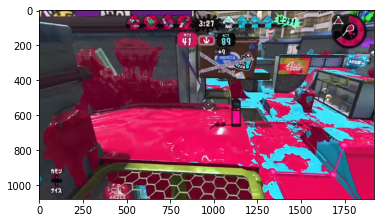

In [379]:
raw_img = cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 3500.jpg')

plt.imshow(raw_img)

th: 127.0


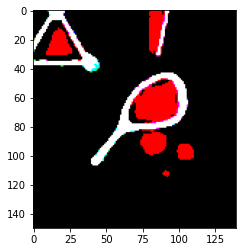

In [386]:
# 単純な閾値処理
ret, th = cv2.threshold(raw_img[40:190,1700:1840], 127, 255, cv2.THRESH_BINARY)
print("th:", ret)

plt.imshow(th)

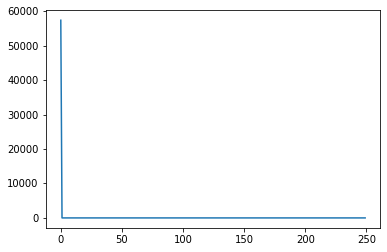

In [387]:
img_hist, img_bins = np.histogram(th.flatten(), bins=np.arange(256+1))
plt.plot(img_hist[:250])
plt.show()

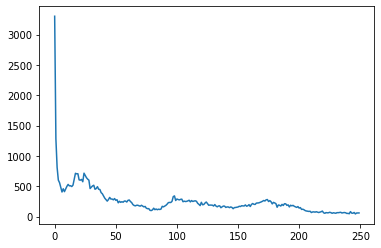

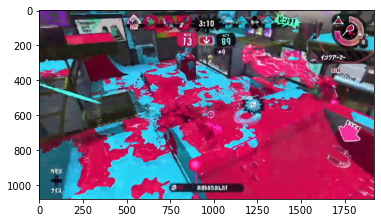

In [383]:
file_path = "/Volumes/cache_transcend/2022/ikalog3/result/Frame: 4000.jpg"

img_hist, img_bins = np.histogram(np.array(cv2.imread(file_path)[40:190,1700:1840]).flatten(), bins=np.arange(256+1))
plt.plot(img_hist[:250])
plt.show()

raw_img = cv2.imread(file_path)

plt.imshow(raw_img)

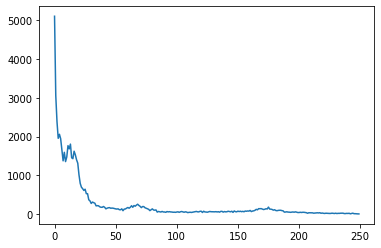

In [357]:
img_hist, img_bins = np.histogram(np.array(cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 2900.jpg')[40:190,1700:1840]).flatten(), bins=np.arange(256+1))
plt.plot(img_hist[:250])
plt.show()

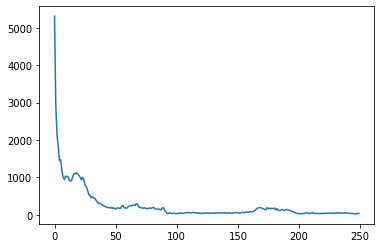

In [358]:
img_hist, img_bins = np.histogram(np.array(cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 3200.jpg')[40:190,1700:1840]).flatten(), bins=np.arange(256+1))
plt.plot(img_hist[:250])
plt.show()

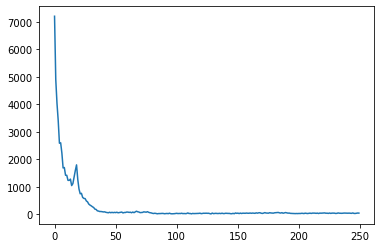

In [373]:
img_hist, img_bins = np.histogram(np.array(cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 4200.jpg')[40:190,1700:1840]).flatten(), bins=np.arange(256+1))
plt.plot(img_hist[:250])
plt.show()

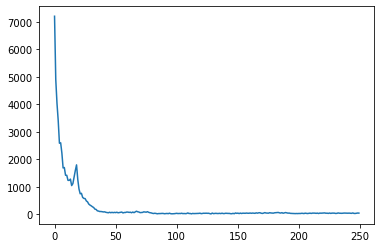

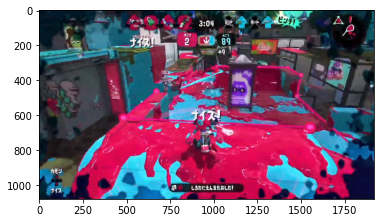

In [384]:
file_path = "/Volumes/cache_transcend/2022/ikalog3/result/Frame: 4200.jpg"

img_hist, img_bins = np.histogram(np.array(cv2.imread(file_path)[40:190,1700:1840]).flatten(), bins=np.arange(256+1))
plt.plot(img_hist[:250])
plt.show()

raw_img = cv2.imread(file_path)

plt.imshow(raw_img)

In [374]:
img_hist[0]

7203

In [375]:
np.sum(img_hist[1:])

55797

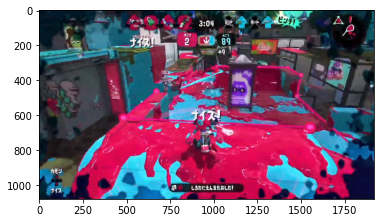

In [372]:
raw_img = cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 4200.jpg')
plt.imshow(raw_img)

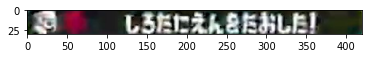

In [319]:
plt.imshow(raw_img[1000:1030, 750:1170])

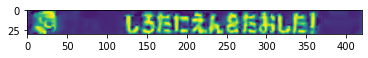

In [320]:
gray_raw_img = cv2.cvtColor(raw_img[1000:1030, 750:1170], cv2.COLOR_BGR2GRAY)
plt.imshow(gray_raw_img)

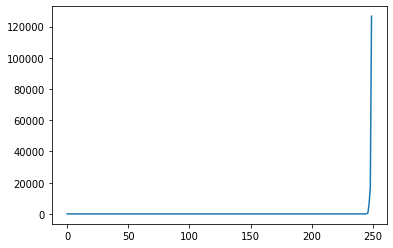

In [377]:
img_hist, img_bins = np.histogram(np.array(cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 500.jpg')).flatten(), bins=np.arange(256+1))
# ヒストグラムの表示
plt.plot(img_hist[:250])
plt.show()

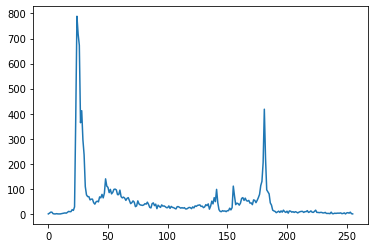

In [355]:
gray_raw_img = cv2.cvtColor(raw_img[1000:1030, 750:1170], cv2.COLOR_BGR2GRAY)
img_hist, img_bins = np.histogram(np.array(gray_raw_img).flatten(), bins=np.arange(256+1))
# ヒストグラムの表示
plt.plot(img_hist)
plt.show()

In [335]:
np.sum(img_hist[:50])

6330

In [336]:
np.sum(img_hist[100:200])

2635

In [333]:
np.sum(img_hist[200:240])

1263

In [340]:
np.sum(img_hist[253:])

309

In [317]:
hist4 = cv2.calcHist(gray_raw_img[50:110, 900:1020],[0],None,[256],[0,256])
plt.plot(hist4,color = col)
plt.xlim([0,256])

error: OpenCV(4.5.4) /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-j3bzctsf/opencv/modules/imgproc/src/histogram.cpp:1291: error: (-215:Assertion failed) nimages > 0 && dims > 0 in function 'calcHist'


In [ ]:
plt.imshow(img[30:120, 900:1000])
def detect_main_screen(img):
    


ValueError: zero-size array to reduction operation minimum which has no identity

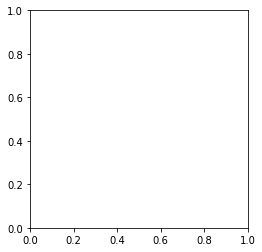

In [265]:
plt.imshow(img[30:120, 530:900])

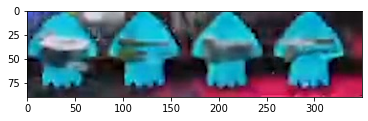

In [266]:
plt.imshow(raw_img[30:120, 1050:1400])

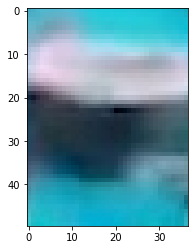

In [267]:
plt.imshow(raw_img[50:100, 1068:1105])
plt.show()

In [268]:
upper = np.array([27,250,255])
#マスク作成
img_mask = cv2.inRange(img, upper, upper)

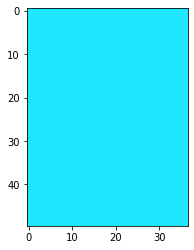

In [269]:
#ブランク画像
height = raw_img[50:100, 1068:1105].shape[0]
width = raw_img[50:100, 1068:1105].shape[1]
blank = np.zeros((height, width, 3))
blank += [255,231,31][::-1]
#画像の表示
#plt.imshow((blank * 255).astype(np.uint8))
plt.imshow(blank.astype('uint8'))
plt.show()

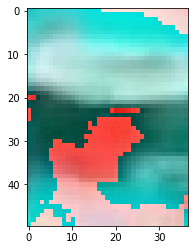

In [270]:
plt.imshow(raw_img[50:100, 1068:1105]-blank.astype('uint8'))
plt.show()

In [249]:
bin_img = cv2.inRange(raw_img[50:100, 1068:1105], (250, 225, 25), (255,231,31))

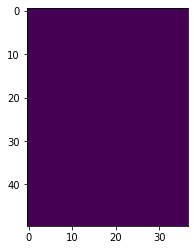

In [250]:
plt.imshow(bin_img)
plt.show()

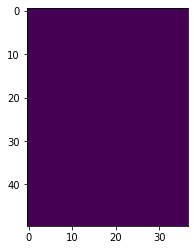

In [282]:
img = raw_img[50:100, 1068:1105]
#plt.imshow(img.astype('uint8'))                 # -1はAlphaを含んだ形式(0:グレー, 1:カラー)
color_lower = np.array([100,0,0])  
#color_lower = np.array([200,220,20])               # 抽出する色の下限(BGR形式)
color_upper = np.array([255,231,31])                 # 抽出する色の上限(BGR形式)
#color_upper = np.array([255,255,40])   
img_mask = cv2.inRange(img, color_lower, color_upper)    # 範囲からマスク画像を作成
plt.imshow(img_mask.astype('uint8'))
img_bool = cv2.bitwise_not(img, img, mask=img_mask)      # 元画像とマスク画像の演算(背景を白くする)
#plt.imshow(img_bool.astype('uint8'))
plt.show()

In [272]:
#ブランク画像
height = img[50:100, 1068:1105].shape[0]
width = img[50:100, 1068:1105].shape[1]
blank = np.zeros((height, width, 3))
blank += [3,0,255][::-1] #RGBで青指定
#blank += [27,0,255][::-1] #RGBで青指定

blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)
plt.imshow(blank)

error: OpenCV(4.5.4) /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-j3bzctsf/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


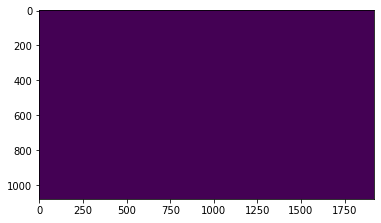

In [174]:
plt.imshow(cv2.rectangle(img, (50, 10), (125, 60), (255, 0, 0)))

In [173]:
img_gray = cv2.cvtColor(img[30:120, 530:900], cv2.COLOR_BGR2GRAY)

In [155]:
template = cv2.imread('weapon/manu.png')
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

In [156]:
# 処理対象画像に対して、テンプレート画像との類似度を算出する
res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# 類似度の高い部分を検出する
threshold = 0.8
loc = np.where(res >= threshold)

# テンプレートマッチング画像の高さ、幅を取得する
h, w = template_gray.shape

# 検出した部分に赤枠をつける
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# 画像の保存
cv2.imwrite('tpl_match_after.png', img)

error: OpenCV(4.5.4) /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-j3bzctsf/opencv/modules/imgproc/src/templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'matchTemplate'


(0.0, 255.0)

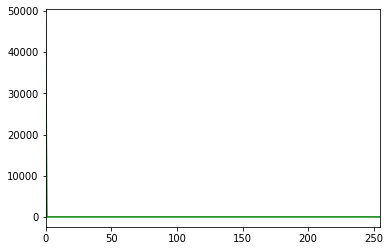

In [142]:
hist1 = cv2.calcHist([img[480:600, 50:450]],[0],None,[256],[0,256])
plt.plot(hist1,color = col)
plt.xlim([0,255])

In [138]:
hist1

array([[48000.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.

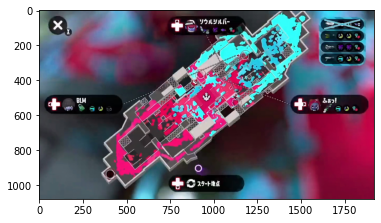

In [116]:
img = cv2.imread('/Volumes/cache_transcend/2022/ikalog3/result/Frame: 2704.jpg')
plt.imshow(img)

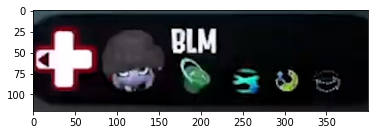

In [117]:
plt.imshow(img[480:600, 50:450])

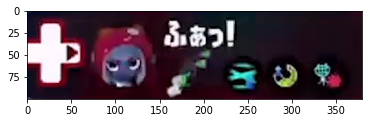

In [118]:
plt.imshow(img[490:590, 1470:1850])

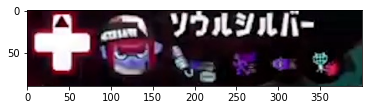

In [119]:
plt.imshow(img[50:140, 750:1150])

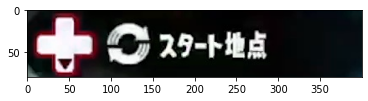

In [120]:
plt.imshow(img[950:1030, 750:1150])

In [108]:
def detect_map(img):
    hist1 = cv2.calcHist([img[480:600, 50:450]],[0],None,[256],[0,256])
    hist2 = cv2.calcHist([img[490:590, 1470:1850]],[0],None,[256],[0,256])
    hist3 = cv2.calcHist([img[50:140, 750:1150]],[0],None,[256],[0,256])
    hist4 = cv2.calcHist(img[950:1030, 750:1150],[0],None,[256],[0,256])
    if np.any(hist1[0:70]>1000) and np.any(hist1[250:]>1000):
        print("1")
        if np.any(hist2[0:70]>1000) and np.any(hist2[250:]>1000:
            print("2")
            if np.any(hist3[0:70]>1000) and np.any(hist3[250:]>1000 :
                print("3")
                if np.any(hist4[0:70]>100):
                    print("map detected.")
    

In [121]:
hist1 = cv2.calcHist([img[480:600, 50:450]],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img[490:590, 1470:1850]],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img[50:140, 750:1150]],[0],None,[256],[0,256])
hist4 = cv2.calcHist(img[950:1030, 750:1150],[0],None,[256],[0,256])

(0.0, 256.0)

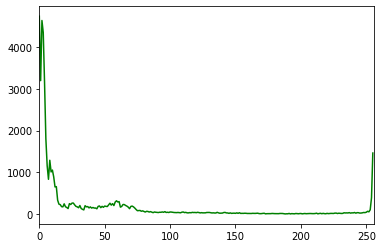

In [122]:
plt.plot(hist1,color = col)
plt.xlim([0,256])

(0.0, 256.0)

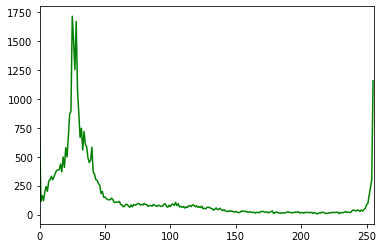

In [123]:
plt.plot(hist2,color = col)
plt.xlim([0,256])

(0.0, 256.0)

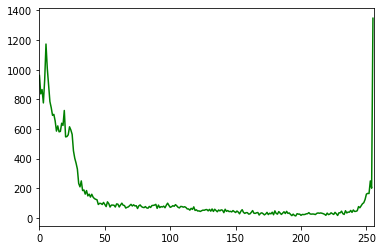

In [124]:
plt.plot(hist3,color = col)
plt.xlim([0,256])

(0.0, 256.0)

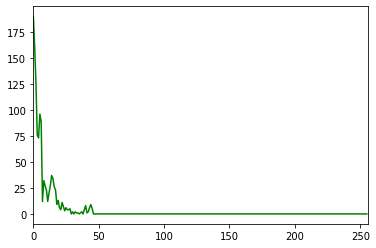

In [126]:
plt.plot(hist4,color = col)
plt.xlim([0,256])

In [105]:
detect_map(img)

array([[3518.],
       [2154.],
       [3208.],
       [3032.],
       [4834.],
       [3060.],
       [2262.],
       [2013.],
       [1795.],
       [1700.],
       [1744.],
       [1202.],
       [1080.],
       [1012.],
       [ 821.],
       [ 936.],
       [ 791.],
       [ 687.],
       [ 665.],
       [ 709.],
       [ 754.],
       [ 708.],
       [ 675.],
       [ 910.],
       [1055.],
       [1023.],
       [ 865.],
       [ 969.],
       [ 819.],
       [1018.],
       [1278.],
       [1325.],
       [1905.],
       [1262.],
       [1169.],
       [1376.],
       [1312.],
       [1492.],
       [1396.],
       [1531.],
       [1266.],
       [1425.],
       [1230.],
       [1219.],
       [1168.],
       [1217.],
       [1414.],
       [1309.],
       [1354.],
       [1219.],
       [1469.],
       [1450.],
       [1528.],
       [1941.],
       [1500.],
       [1098.],
       [ 924.],
       [ 946.],
       [ 870.],
       [ 875.],
       [ 913.],
       [ 840.],
       [

(array([42., 36., 16.,  8.,  9., 16.,  6.,  8.,  3.,  8.,  6.,  2.,  5.,
         4.,  3.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
         1.,  2.,  1.,  0.,  0.,  1.,  0.,  2.,  3.,  2.,  0.,  1.,  0.,
         2.,  0.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  0.,  1.,
         2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,  3.,  1.,  0.,
         3.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  1.,  1.,  2.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

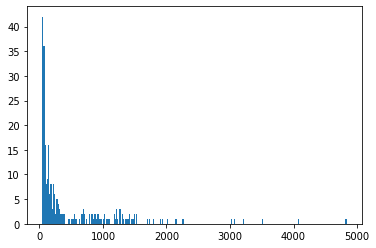

In [99]:
plt.hist(detect_map(img), bins=256)

(0.0, 256.0)

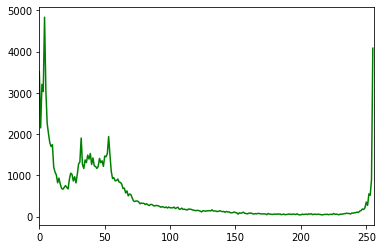

In [100]:
    plt.plot(detect_map(img),color = col)
    plt.xlim([0,256])

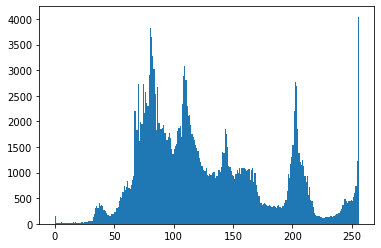

In [70]:
img = cv2.imread('result/Frame: 1012.jpg')
hist1 = cv2.calcHist([img[480:600, 50:450]],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img[490:590, 1470:1850]],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img[50:140, 750:1150]],[0],None,[256],[0,256])
hist4 = cv2.calcHist([950:1030, 750:1150],[0],None,[256],[0,256])

plt.hist(img[240:500, 800:1100].ravel(),256,[0,256]); plt.show()

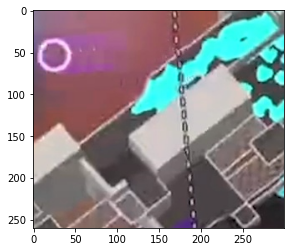

In [71]:
plt.imshow(img[240:500, 800:1100])

In [17]:
hist[:100]

array([[2.4677e+04],
       [1.2070e+03],
       [3.7000e+02],
       [2.4000e+02],
       [1.1900e+02],
       [8.6000e+01],
       [6.5000e+01],
       [4.0000e+01],
       [3.3000e+01],
       [1.5000e+01],
       [1.1000e+01],
       [8.0000e+00],
       [0.0000e+00],
       [3.0000e+00],
       [4.0000e+00],
       [0.0000e+00],
       [2.0000e+00],
       [0.0000e+00],
       [6.0000e+00],
       [7.0000e+00],
       [0.0000e+00],
       [7.9000e+01],
       [0.0000e+00],
       [5.0000e+00],
       [3.0000e+00],
       [0.0000e+00],
       [4.0000e+00],
       [2.0000e+00],
       [2.0000e+01],
       [4.0000e+00],
       [3.0000e+00],
       [0.0000e+00],
       [5.0000e+00],
       [2.7000e+01],
       [2.4000e+01],
       [6.0000e+00],
       [9.0000e+00],
       [0.0000e+00],
       [3.0000e+00],
       [3.0000e+01],
       [2.0000e+00],
       [0.0000e+00],
       [4.0000e+00],
       [2.0000e+01],
       [0.0000e+00],
       [3.0000e+00],
       [2.2000e+01],
       [0.000

In [68]:
def find_rankmatch_title(hist_value):
    if hist_value[0] > 5000:
        print("1")
        if hist_value[255] > 500:
            print("2")
            if np.all(hist_value[20:200]<1000):
                print("true")
                return True

In [69]:
find_rankmatch_title(cv2.calcHist([img[240:500, 800:1100]],[0],None,[256],[0,256]))

1
2
true


True

error: OpenCV(4.5.4) /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-j3bzctsf/opencv/modules/imgproc/src/histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'histPrepareImages'


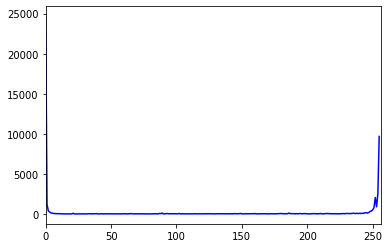

In [11]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [34]:
import cv2
i = 0
path = '1080p.mp4'
cap = cv2.VideoCapture(path)

In [35]:
#動画サイズ取得
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#フレームレート取得
fps = cap.get(cv2.CAP_PROP_FPS)

#フォーマット指定
fmt = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')

writer = cv2.VideoWriter('result/output.mp4', fmt, fps, (width, height))

In [36]:
while True :
    print("Frame: "+ str(i))
    #フレーム情報取得
    ret, img = cap.read()
    
    #動画が終われば処理終了
    if ret == False:
        break
    
    
    #動画書き込み
    cv2.imwrite("result/Frame: "+ str(i)+'.jpg', img)
    
    i +=1
    
cap.release()
#これを忘れるとプログラムが出力ファイルを開きっぱなしになる
writer.release()
cv2.destroyAllWindows()

Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12
Frame: 13
Frame: 14
Frame: 15
Frame: 16
Frame: 17
Frame: 18
Frame: 19
Frame: 20
Frame: 21
Frame: 22
Frame: 23
Frame: 24
Frame: 25
Frame: 26
Frame: 27
Frame: 28
Frame: 29
Frame: 30
Frame: 31
Frame: 32
Frame: 33
Frame: 34
Frame: 35
Frame: 36
Frame: 37
Frame: 38
Frame: 39
Frame: 40
Frame: 41
Frame: 42
Frame: 43
Frame: 44
Frame: 45
Frame: 46
Frame: 47
Frame: 48
Frame: 49
Frame: 50
Frame: 51
Frame: 52
Frame: 53
Frame: 54
Frame: 55
Frame: 56
Frame: 57
Frame: 58
Frame: 59
Frame: 60
Frame: 61
Frame: 62
Frame: 63
Frame: 64
Frame: 65
Frame: 66
Frame: 67
Frame: 68
Frame: 69
Frame: 70
Frame: 71
Frame: 72
Frame: 73
Frame: 74
Frame: 75
Frame: 76
Frame: 77
Frame: 78
Frame: 79
Frame: 80
Frame: 81
Frame: 82
Frame: 83
Frame: 84
Frame: 85
Frame: 86
Frame: 87
Frame: 88
Frame: 89
Frame: 90
Frame: 91
Frame: 92
Frame: 93
Frame: 94
Frame: 95
Frame: 96
Frame: 97
Frame: 98
Frame: 99
Frame: 100